# Домашнее задание к лекции «Работа с переменными»

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [113]:
# Загрузим данные и посмотрим на них

data = pd.read_csv(load_boston()['filename'], skiprows=1)
target = data['MEDV']

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [107]:
# Вспомогательные функции
# Для оценки модели будем использовать RMSE

def get_score(X, y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
    model.fit(X_train, y_train)
    pred_values_train = model.predict(X_train)
    pred_values_test = model.predict(X_test)
    print('TRAIN')
    print('Error RMSE: {}'.format(np.sqrt(mean_squared_error(y_train, pred_values_train))))    
    print('Score: {}'.format(model.score(X_train, y_train)))   
    print()
    print('TEST')
    print('Error RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, pred_values_test))))    
    print('Score: {}'.format(model.score(X_test, y_test)))   

def get_boxplot(X, columns=[]):
  for i in columns:
    sns.boxplot(x=X[i])
  pass  

def get_pairplot(X, columns=None):
  if columns is None:
    columns = list(X.columns)
  sns.pairplot(X[columns])
  pass   

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Данные уже масштабированы и в них нет пропусков, поэтому эти шаги можно пропустить.

Посмотрим на целевую переменную:

In [109]:
data['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

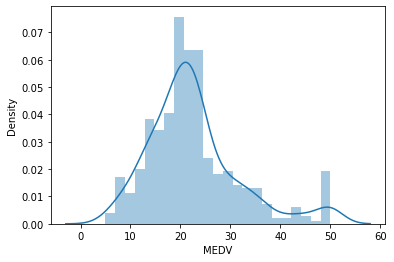

In [110]:
sns.distplot(target)

Целевая переменная распределена нормально со смещением влево, также есть заметное кол-во значений в районе 50.

Также посмотрим на матрицу корреляций и тепловую карту:

In [111]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

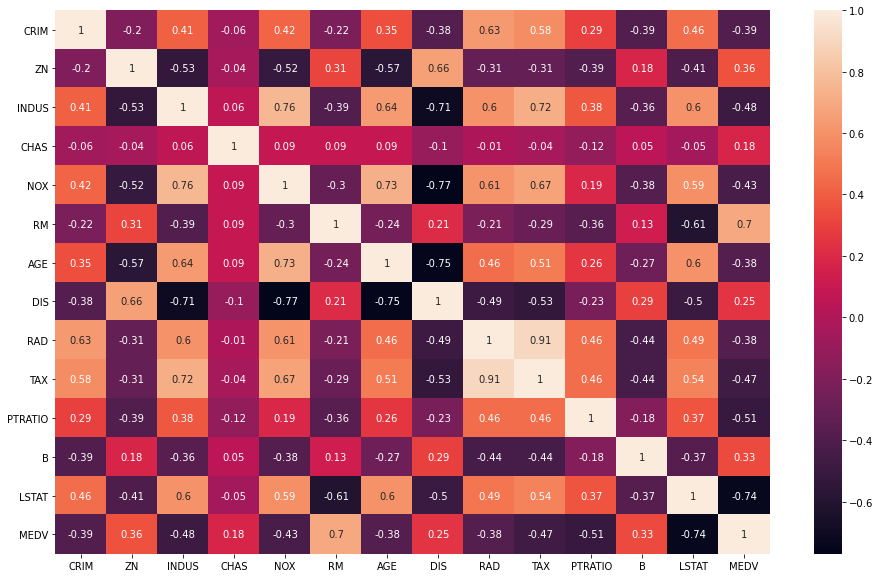

In [112]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr().round(2), annot=True)

По этим данным видно, что цена недвижимости больше всего коррелирует с:

    - RM - среднее количество комнат в доме
    - LSTAT - % населения с низким соц. статусом

Также есть заметная корреляция с:

    - PTRATIO -  соотношение учитель/ученик
    - TAX - ставка налога на имущество за 10 000 долларов
    - INDUS - доля акров, не относящихся к розничной торговле
    
Кроме того, есть очень сильные корреляции между другими признаками. Например TAX (ставка налога) очень сильно коррелирует с RAD (индекс доступности радиальных дорог), а DIS (расстояние до центров занятости) имеет обратную корреляцию с INDUS (доля акров), NOX (концентрация оксидов азота) и AGE (Доля до 1940 г)

<Figure size 1152x720 with 0 Axes>

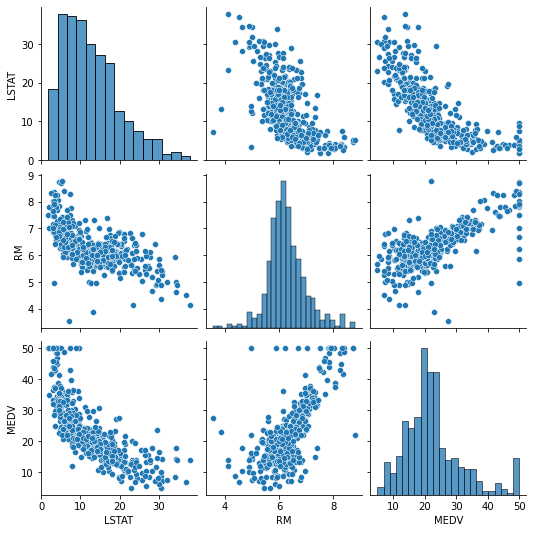

In [114]:
# Посмотрим на pairplot для самых скоррелированныз признаков

plt.figure(figsize=(16, 10))
get_pairplot(data, columns=['LSTAT', 'RM', 'MEDV'])

Для начала я хочу обучить модель на всех данных без разбора, это будет отправная точка:

In [115]:
get_score(data.drop('MEDV', axis=1), target)

TRAIN
Error RMSE: 4.748208239685937
Score: 0.7434997532004697

TEST
Error RMSE: 4.638689926172799
Score: 0.711226005748496


Теперь попробуем выбрать более важные признаки.

Единственная категориальная переменная в дата-сете - CHAS - показывает, ограничен ли участок рекой. Она имеет минимальную корреляцию с ценой недвежимости, поэтому не буду её использовать.

DIS - расстояния до пяти бостонских центров занятости имеет небольшую корреляцию с целевой переменной, и сильную с некоторыми другими признаками. Насколько я знаю, не рекомендуется использовать переменные, которые сильно коррелируют друг с другом из-за проблем с интерпретацией (сложно сказать как каждая из этих переменных повлияла на целевую, так как они зависят друг от друга). 

По той же причине не буду использовать RAD - индекс доступности радиальных автомобильных дорог, у нас уже есть налог на имущество (TAX корр. 0.91), и TAX больше скоррелирован с целевой переменной, поэтому оставляю его

Остальные переменные пока попробуем оставить. Итого:

In [116]:
get_score(data.drop(['CHAS', 'DIS', 'RAD', 'MEDV'], axis=1), target)

TRAIN
Error RMSE: 5.109734675439706
Score: 0.7029531356065293

TEST
Error RMSE: 5.166162784845871
Score: 0.6418181567129002


Качество упало.

<b>Вопрос: правильно ли я понимаю, что лучше обучать модель не на всех признаках, а только на самых значимых, на которых действительно видно какую-то связь, даже если ошибка при этом несколько выше? Или можно обучать на всех, если это даётприрост к эффективности?</b>

Теперь попробую посмотреть, что будет, если обучать модель только на сильно скоррелированных переменных (возьмём кол-во комнат, соц. статус, соотношение учитель/ученик):

In [118]:
get_score(data[['LSTAT', 'RM', 'PTRATIO']], target)

TRAIN
Error RMSE: 5.261867032464956
Score: 0.6850018441906279

TEST
Error RMSE: 5.100216850500207
Score: 0.650904156861472


Качество модели на тестовой выборке даже улучшилось. Скорее всего, из этого можно предположить, что использовать другие признаки не так много смысла.

Теперь немного работы с данными. По графикам видно, что целевая переменная не поднимается выше ровно 50, это похоже толи на выбросы, толи на искусственные ограничения, что может искажать результат обучения. Попробуем построить модель без этих районов. 

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

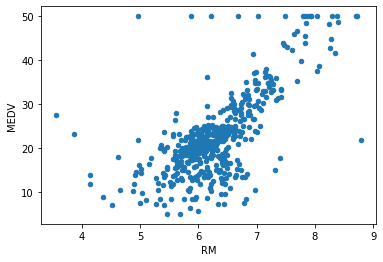

In [119]:
data[['RM', 'MEDV']].plot(kind='scatter', x='RM', y='MEDV')

In [121]:
df = data[data.MEDV < 50]

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [122]:
df.shape

(490, 14)

In [123]:
get_score(df[['LSTAT', 'RM', 'PTRATIO']], df.MEDV)

TRAIN
Error RMSE: 4.333712782945438
Score: 0.7103401721175919

TEST
Error RMSE: 3.929894049140974
Score: 0.7058701162343138


Качество модели улучшилось.

В качестве эксперемента я попробую ввести странный тестовый признак, а именно перемножить  RM и LSTAT.

In [124]:
df['test_var'] = df.LSTAT * df.RM
df.head()

<ipython-input-124-63c76a163e7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['test_var'] = df.LSTAT * df.RM


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,test_var
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,32.74350
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,58.68794
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,28.95555
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,20.57412
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,38.09351


In [126]:
get_score(df[['LSTAT', 'RM', 'PTRATIO', 'test_var']], df.MEDV)

TRAIN
Error RMSE: 3.710688537273344
Score: 0.7876378940442748

TEST
Error RMSE: 3.3065746034831047
Score: 0.7917744014442534


Качество заметно улучшилось, но я не думаю, что это валидный способ создания признака, потомучто он неинтерпретируемый (например, мне было бы сложно объяснить заказчику, что такое произведение кол-ва комнат на соц.статус).

Теперь ещё один эксперемент, чуть более осмысленный. Допустим, что уровень преступности CRIM может зависеть от кол-ва чернокожего населения:

In [127]:
df['crim_b'] = df.CRIM * df.B
df.head()

<ipython-input-127-539d2137b858>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crim_b'] = df.CRIM * df.B


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,test_var,crim_b
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,32.74350,2.508408
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,58.68794,10.839339
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,28.95555,10.720331
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,20.57412,12.774173
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,38.09351,27.405945


In [128]:
get_score(df[['LSTAT', 'RM', 'PTRATIO', 'crim_b']], df.MEDV)

TRAIN
Error RMSE: 4.300696716457511
Score: 0.7147368635840821

TEST
Error RMSE: 3.883561910959627
Score: 0.7127646194605627


Качество на тестовой выборке стало лучше. У меня нет уверенности, что этот признак нужно использовать, но он более интерпретируемый.